# KNN (K Nearest Neighbor )

- KNN is like a asking your neighbor for advice 
- if most of your nearby neighbors are wearing jackets, its probably cold outside 
- if your near people who pass the exam chances are you will too
- KNN predicts based on
- the "K" closes neighbor
- majority vote for classification
- average value for regression


| Neighbor | Height(cm) | Weight(kg) | Play Basketball? |
|----------|------------|------------|------------------|
| A | 180 | 75 | Yes |
| B | 175 | 70 | Yes |
| C | 160 | 60 | No |

- you are 178cm tall, 73 kg weight
- ask k = 3 neighbors
- 2 say yes 1 say no
- so KNN predicts you probably play basketball

#### how KNN works?

- choose k(no of neighbors to consult)
- calculate distance from others 
- find k closest neighbors 
- vote or average their values

#### benifits of KNN

- Simple
- No Training Time
- Works for Classification & Regression

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['species'] = data.target
print(df)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     species  
0          0

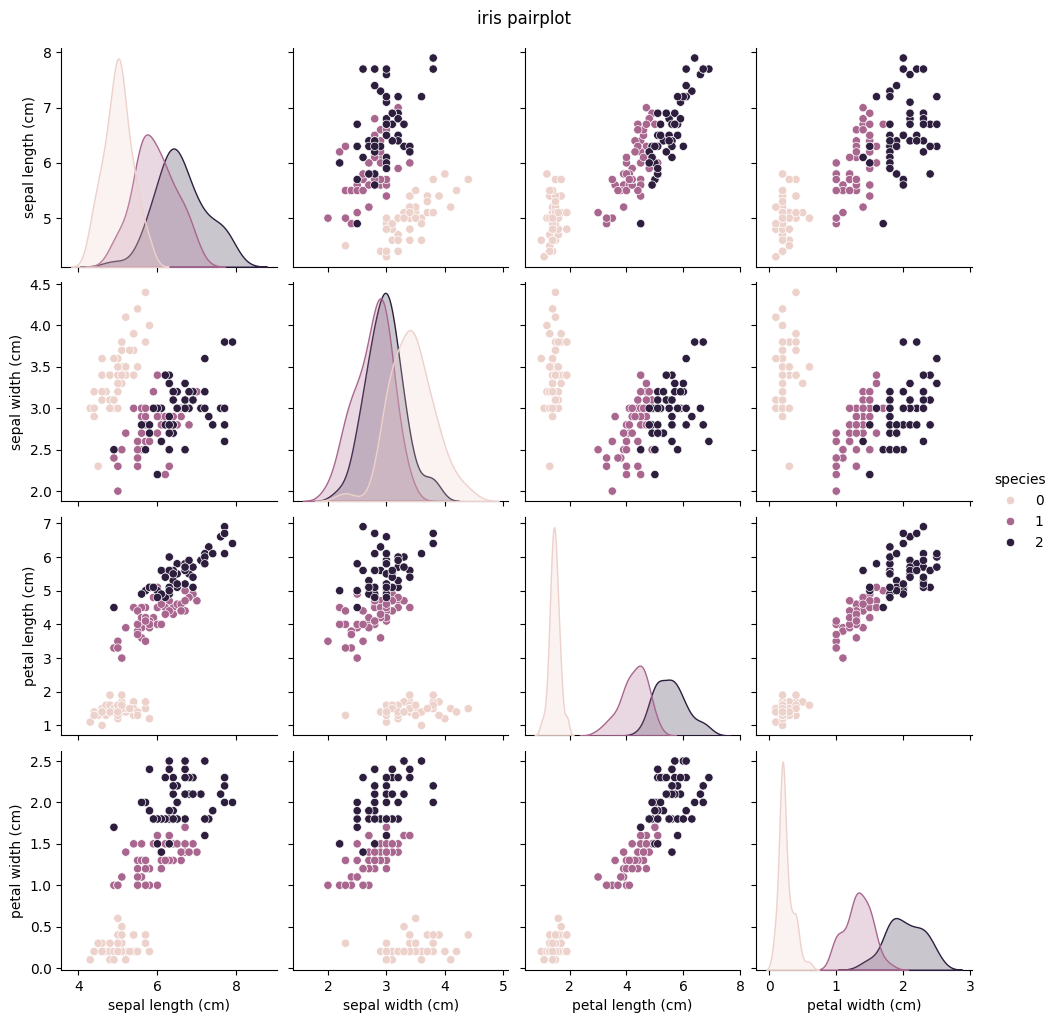

In [9]:
sns.pairplot(df, hue = "species",diag_kind = "kde")
plt.suptitle("iris pairplot",y = 1.02 )
plt.show()


In [10]:
X = df.drop("species",axis = 1)
y = df["species"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [12]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = KNN.predict(X_test)


In [14]:
print(accuracy_score(y_test,y_pred))


1.0


In [15]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [16]:
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


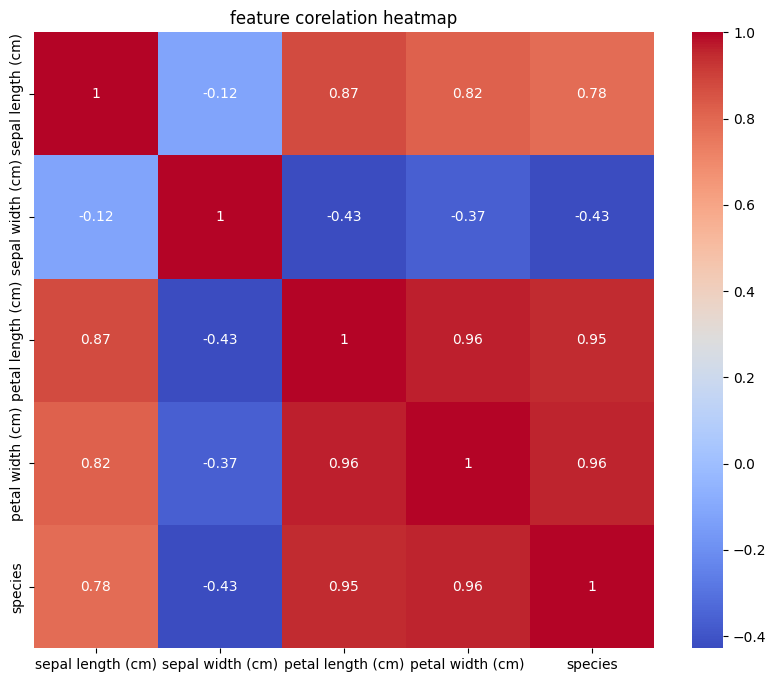

In [19]:
plt.figure(figsize =(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot = True, cmap = "coolwarm")
plt.title("feature corelation heatmap")
plt.show()